In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [27]:
from sklearn.cluster import KMeans as scikit_KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
mushroom = pd.read_csv("data/agaricus-lepiota.data", header=None)

In [4]:
mushroom.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
colunas = ["classification", "cap-shape","cap-surface", "cap-color", "is-bruises", "odor", "gill-attachment", 
           "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
           "stalk-surface-below-ring","stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
           "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

In [9]:
mushroom.columns = colunas

In [13]:
mushroom.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
classification,p,e,e,p,e,e,e,e,p,e,e,e,e,p,e,e,e,p,p,p
cap-shape,x,x,b,x,x,x,b,b,x,b,x,x,b,x,x,s,f,x,x,x
cap-surface,s,s,s,y,s,y,s,y,y,s,y,y,s,y,f,f,f,s,y,s
cap-color,n,y,w,w,g,y,w,w,w,y,y,y,y,w,n,g,w,n,w,n
is-bruises,t,t,t,t,f,t,t,t,t,t,t,t,t,t,f,f,f,t,t,t
odor,p,a,l,p,n,a,a,l,p,a,l,a,a,p,n,n,n,p,p,p
gill-attachment,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f
gill-spacing,c,c,c,c,w,c,c,c,c,c,c,c,c,c,w,c,w,c,c,c
gill-size,n,b,b,n,b,b,b,b,n,b,b,b,b,n,b,n,b,n,n,n
gill-color,k,k,n,n,k,n,g,n,p,g,g,n,w,k,n,k,k,n,n,k


In [14]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classification            8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   is-bruises                8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [16]:
mushroom.describe().T

,count,unique,top,freq
classification,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
is-bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [24]:
mushroom[["ring-number", "population"]].describe()

,ring-number,population
count,8124,8124
unique,3,6
top,o,v
freq,7488,4040


Item 1 (Estatísticas Descritivas): Usando o conjunto de dados a você atribuído conforme a tabela
mostrada na próxima página, pede-se:

In [22]:
mushroom["cap-color"].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

In [23]:
mushroom["gill-color"].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [25]:
mushroom["stalk-root"].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [26]:
mushroom["odor"].value_counts()

n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [34]:
mushroom["veil-type"].value_counts()

0    8124
Name: veil-type, dtype: int64

In [30]:
labelencoder=LabelEncoder()
for column in mushroom.columns:
    mushroom[column] = labelencoder.fit_transform(mushroom[column])

In [31]:
mushroom.head()

,classification,cap-shape,cap-surface,cap-color,is-bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [32]:
corr = mushroom.corr()
corr.style.background_gradient(cmap='coolwarm')

/home/eduardo/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/eduardo/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/eduardo/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,classification,cap-shape,cap-surface,cap-color,is-bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
classification,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,nan,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,nan,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,nan,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,nan,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
is-bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,nan,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,nan,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,nan,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,nan,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,nan,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,nan,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [35]:
mushroom.describe()

,classification,cap-shape,cap-surface,cap-color,is-bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


1.1 - Escolher dois atributos quaisquer e calcular suas estatísticas descritivas (global e por
classe), organizando-as conforme tabela abaixo.

In [50]:
def valores(coluna, classe):
    if(classe == -1):
        print (str(coluna)+" Global:   Média = "+str(round(mushroom[coluna].mean(), 2))
                   +", Desvio Padrão = "+str(round(mushroom[coluna].std(), 2))
                   +", Mediana = "+str(round(mushroom[coluna].median(), 2))
                   +", Minimo/Maximo = "+str(round(mushroom[coluna].min(), 2))+"/"
                   +str(round(mushroom[coluna].max(), 2)))
    else:
        print (str(coluna)+" Classe "+str(classe)+": Média = "
                    +str(round(mushroom[mushroom.classification==classe][coluna].mean(), 2))
                    +", Desvio Padrão = "+str(round(mushroom[mushroom.classification==classe][coluna].std(), 2))
                    +", Mediana = "+str(round(mushroom[mushroom.classification==classe][coluna].median(), 2))
                    +", Minimo/Maximo = "+str(round(mushroom[mushroom.classification==classe][coluna].min(), 2))
                                     +"/"+str(round(mushroom[mushroom.classification==classe][coluna].max(), 2)))

In [51]:
for i in range(-1, 2):
    valores("cap-color", i)

cap-color Global:   Média = 4.5, Desvio Padrão = 2.55, Mediana = 4.0, Minimo/Maximo = 0/9
cap-color Classe 0: Média = 4.58, Desvio Padrão = 2.43, Mediana = 4.0, Minimo/Maximo = 0/9
cap-color Classe 1: Média = 4.42, Desvio Padrão = 2.66, Mediana = 4.0, Minimo/Maximo = 0/9


In [52]:
for i in range(-1, 2):
    valores("population", i)

population Global:   Média = 3.64, Desvio Padrão = 1.25, Mediana = 4.0, Minimo/Maximo = 0/5
population Classe 0: Média = 3.28, Desvio Padrão = 1.55, Mediana = 4.0, Minimo/Maximo = 0/5
population Classe 1: Média = 4.03, Desvio Padrão = 0.61, Mediana = 4.0, Minimo/Maximo = 1/5


1.2 – Escolha uma das classes (de preferência a que possuir mais dados) e estime o (i) seu
centróide e (ii) sua matriz de covariância. Mostrar como foi realizado/feito/implementado
este subitem.

In [54]:
mushroom.classification.value_counts()

0    4208
1    3916
Name: classification, dtype: int64

In [16]:
dados = wine[["Alcohol", "Malic acid"]]

In [17]:
dados.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


Centroid

In [18]:
#Global
dataset = np.array(wine)
round(dataset[:,1].mean(), 2), round(dataset[:,2].mean(), 2)

(13.0, 2.34)

In [19]:
#Classe 2
dataset2 = np.array(wine[wine.Class==2])
round(dataset2[:,1].mean(), 2), round(dataset2[:,2].mean(), 2)

(12.28, 1.93)

Matriz de Covariancia

In [20]:
np.cov(dataset[:,1], dataset[:,2])

array([[0.65906233, 0.08561131],
       [0.08561131, 1.2480154 ]])

In [21]:
corr = dados.corr()
corr.style.background_gradient(cmap='coolwarm')

,Alcohol,Malic acid
Alcohol,1.000000,0.094397
Malic acid,0.094397,1.000000


1.3 – Para a classe do Subitem 1.2, fazer o gráfico de dispersão dos atributos escolhidos
para resolução do Subitem 1.1. Colocar nomes dos atributos nos eixos dos gráficos.

In [22]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

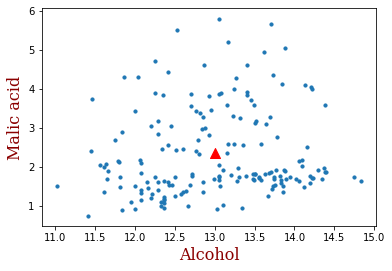

In [35]:
plt.scatter(dataset[:,1], dataset[:,2], s=10)
plt.scatter(dataset[:,1].mean(), dataset[:,2].mean(), marker='^', c='red', s=100)
plt.xlabel('Alcohol', fontdict=font)
plt.ylabel('Malic acid', fontdict=font)
plt.show()

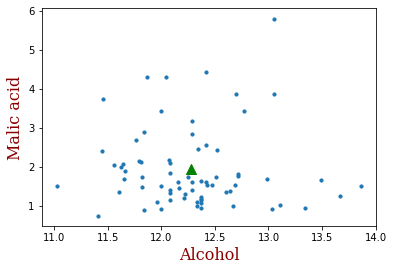

In [24]:
plt.scatter(dataset2[:,1], dataset2[:,2], s=10)
plt.scatter(dataset2[:,1].mean(), dataset2[:,2].mean(), marker='^', c='green', s=100)
plt.xlabel('Alcohol', fontdict=font)
plt.ylabel('Malic acid', fontdict=font)
plt.show()

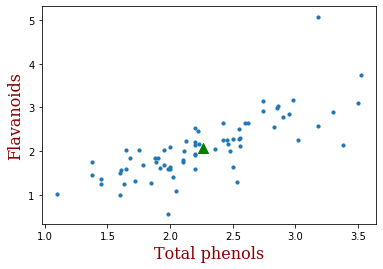

In [25]:
plt.scatter(dataset2[:,6], dataset2[:,7], s=10)
plt.scatter(dataset2[:,6].mean(), dataset2[:,7].mean(), marker='^', c='green', s=100)
plt.xlabel('Total phenols', fontdict=font)
plt.ylabel('Flavanoids', fontdict=font)
plt.show()

1.4 – O diagrama de dispersão do Subitem 1.3 indica a existência de algum tipo de
correlação entre os dois atributos escolhidos? Detalhe sua resposta.

Não. Para os atributos Alcohol e Malic acid a correlação entre eles é 0.094397, ou seja proxima de zero.
Já a correlação entre Total phenols e Flavanoids é 0.864564, muito próximo de 1.

1.5 - Estimar o coeficiente de correlação entre os dois atributos escolhidos para resolução
do Subitem 1.3 para a classe escolhida. Mostrar os cálculos e qual método/procedimento
foi utilizado para realizá-los.

1.6 – Determinar os parâmetros a (inclinação) e b (intercepto) da reta de tendência para os
gráfico de dispersão mostrado no Subitem 1.3. Mostrar os cálculos e qual
método/procedimento foi utilizado.

1.7 - Escolha um dos atributos usados na resolução do Subitem 1.1 e gere o histograma
correspondente para uma classe de sua escolha. A distribuição do atributo escolhido
assemelha-se a uma gaussiana? Há suspeita de presença de outliers nos dados? Detalhe sua
resposta.

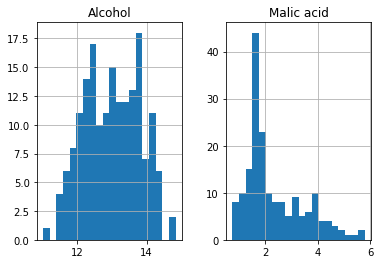

In [31]:
dados.hist(bins=20);

1.8 – Aplique o método de Box-Cox aos dados do Subitem 1.7 e, em seguida, aplique a
transformação z-score (normalização para média zero e variância unitária). Forneça o
histograma para o novo conjunto de medidas. A distribuição dos novos dados ficou mais
próxima de uma gaussiana? Detalhe sua resposta.

In [32]:
from scipy import stats
import seaborn as sns

In [33]:
test_data = stats.boxcox(dados['Alcohol'])

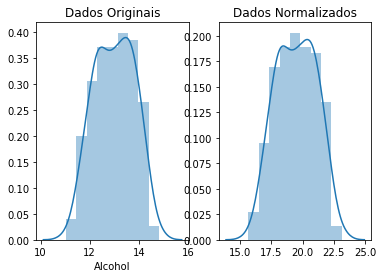

In [34]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(dados['Alcohol'], ax=ax[0])
ax[0].set_title("Dados Originais");
sns.distplot(test_data[0], ax=ax[1])
ax[1].set_title("Dados Normalizados");